<a href="https://colab.research.google.com/github/Sourav-Manik/AI_Deep_Learning/blob/main/CNN_Lenet_5_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Import Necessary Libraries

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
import numpy as np
from matplotlib import pyplot as plt

# 2.Import Dataset

In [ ]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


#3.Data Understanding

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
X_train.std(), X_test.std()

(78.56748998339798, 79.17246322228644)

#4.Data Preparation

In [ ]:
X_train = np.pad(array = X_train, pad_width = ((0,0),(2,2),(2,2)))
X_test = np.pad(array = X_test, pad_width = ((0,0),(2,2),(2,2)))

In [ ]:
X_train.shape,X_test.shape

((60000, 32, 32), (10000, 32, 32))

In [ ]:
X_train = np.reshape(X_train, newshape = (60000,32,32,1))
X_test = np.reshape(X_test, newshape = (10000,32,32,1))

In [ ]:
X_train.shape,X_test.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

In [ ]:
X_train.std(), X_test.std()

(70.18042327879914, 70.7392952533762)

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [ ]:
X_train.dtype, X_test.dtype

(dtype('float64'), dtype('float64'))

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train.std(), X_test.std()

(0.2752173461913686, 0.2774090009936321)

# 5.Model Building

## 5.1.Build Model Architecture

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape = (32,32,1),filters = 6,kernel_size = (5,5),strides = 1,padding = 'valid',activation = 'tanh'))
model.add(AveragePooling2D(pool_size =2 ,strides = 2))
model.add(Conv2D(filters = 16,kernel_size = (5,5),strides = 1,padding = 'valid',activation = 'tanh'))
model.add(AveragePooling2D(pool_size =2 ,strides = 2))
model.add(Conv2D(filters = 120,kernel_size = (5,5),strides = 1,padding = 'valid',activation = 'tanh'))
model.add(Flatten())

model.add(Dense(units = 84, activation = 'tanh'))
model.add(Dense(units = 10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

## 5.2.Model Compilation

In [ ]:
model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy',metrics='sparse_categorical_accuracy')

# 6.Model Training

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 32, 32, 1), (60000,), (10000, 32, 32, 1), (10000,))

In [ ]:
model_training = model.fit(x=X_train,y=y_train,batch_size = 150,epochs = 25, validation_data=(X_test,y_test),verbose = 2)

Epoch 1/25
400/400 - 41s - loss: 1.3988 - sparse_categorical_accuracy: 0.6679 - val_loss: 0.6630 - val_sparse_categorical_accuracy: 0.8342 - 41s/epoch - 102ms/step
Epoch 2/25
400/400 - 31s - loss: 0.5365 - sparse_categorical_accuracy: 0.8591 - val_loss: 0.4336 - val_sparse_categorical_accuracy: 0.8878 - 31s/epoch - 76ms/step
Epoch 3/25
400/400 - 32s - loss: 0.4033 - sparse_categorical_accuracy: 0.8902 - val_loss: 0.3562 - val_sparse_categorical_accuracy: 0.9051 - 32s/epoch - 79ms/step
Epoch 4/25
400/400 - 31s - loss: 0.3474 - sparse_categorical_accuracy: 0.9017 - val_loss: 0.3137 - val_sparse_categorical_accuracy: 0.9128 - 31s/epoch - 79ms/step
Epoch 5/25
400/400 - 34s - loss: 0.3139 - sparse_categorical_accuracy: 0.9095 - val_loss: 0.2862 - val_sparse_categorical_accuracy: 0.9203 - 34s/epoch - 86ms/step
Epoch 6/25
400/400 - 31s - loss: 0.2892 - sparse_categorical_accuracy: 0.9162 - val_loss: 0.2651 - val_sparse_categorical_accuracy: 0.9241 - 31s/epoch - 77ms/step
Epoch 7/25
400/400 - 

# 7.Model Evaluation

In [ ]:
model.evaluate(x= X_test,y = y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.1007 - sparse_categorical_accuracy: 0.9692


[0.10065476596355438, 0.9692000150680542]

# 8.Model Prediction

In [ ]:
prediction = model.predict(X_test)
prediction
print(np.argmax(prediction[29]))

313/313 [==============================] - 4s 11ms/step
1


In [ ]:
y_test[29]

1

# 9.Model Performance

## 9.1.Model Accuracy Performance

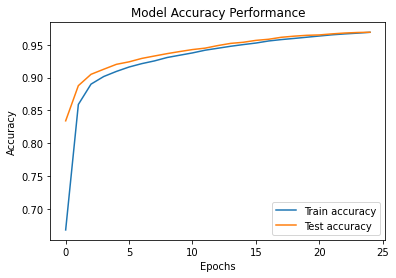

In [ ]:
plt.plot(model_training.history['sparse_categorical_accuracy'],label = 'Train accuracy')

plt.plot(model_training.history['val_sparse_categorical_accuracy'],label='Test accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Performance')
plt.legend()
plt.show()

##9.2.Model Loss Performance

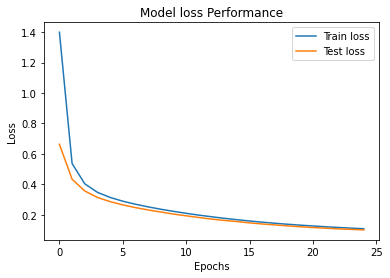

In [ ]:
plt.plot(model_training.history['loss'],label = 'Train loss')

plt.plot(model_training.history['val_loss'],label='Test loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model loss Performance')
plt.legend()
plt.show()